In [59]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,davies_bouldin_score
import matplotlib.pyplot as plt

In [60]:
df = pd.read_csv("D:/Mall_Customers.csv")
print(df.columns)

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


In [61]:
df_numeric = df[['Age', 'Annual Income (k$)','Spending Score (1-100)']]
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)
print(df_scaled[:5])

[[-1.42456879 -1.73899919 -0.43480148]
 [-1.28103541 -1.73899919  1.19570407]
 [-1.3528021  -1.70082976 -1.71591298]
 [-1.13750203 -1.70082976  1.04041783]
 [-0.56336851 -1.66266033 -0.39597992]]


In [62]:
kmeans = KMeans(n_clusters=3,random_state=42)
kmeans.fit(df_scaled)

C:\Users\indum\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [63]:
df['Cluster'] = kmeans.labels_

In [69]:
sil_score = silhouette_score(df_scaled,kmeans.labels_)
db_index = davies_bouldin_score(df_scaled,kmeans.labels_)
print(f"Silhouette Score:{sil_score:.2f}")
print(f"Davies-Bouldin Index:{db_index:.2f}")

Silhouette Score:0.36
Davies-Bouldin Index:1.03


In [71]:
scores = []
for n_clusters in range(2,6):
    kmeans = KMeans(n_clusters=n_clusters,random_state=42)
    kmeans.fit(df_scaled)
    sil_score = silhouette_score(df_scaled,kmeans.labels_)
    db_index = davies_bouldin_score(df_scaled,kmeans.labels_)
    scores.append([n_clusters,sil_score,db_index])
score_df  = pd.DataFrame(scores,columns=['Clusters', 'Silhouette Score', 'Davies-Bouldin Index'])
print(score_df)

   Clusters  Silhouette Score  Davies-Bouldin Index
0         2          0.335472              1.260682
1         3          0.357923              1.032689
2         4          0.403958              0.930796
3         5          0.408469              0.888969


C:\Users\indum\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\indum\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\indum\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\indum\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

C:\Users\indum\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


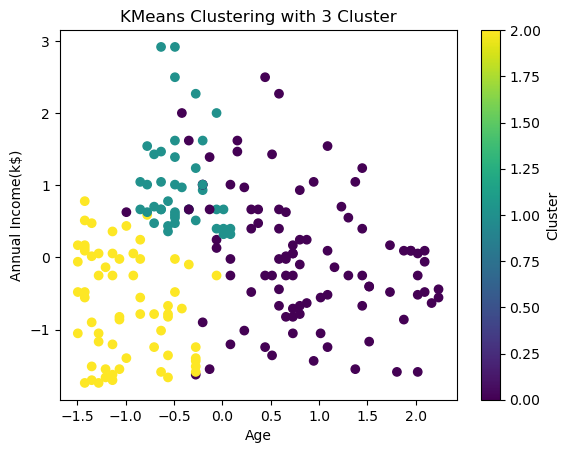

In [73]:
best_k = 3
kmeans = KMeans(n_clusters=best_k,random_state=42)
kmeans.fit(df_scaled)

plt.scatter(df_scaled[:,0],df_scaled[:,1],c=kmeans.labels_,cmap='viridis')
plt.title(f"KMeans Clustering with {best_k} Cluster")
plt.xlabel("Age")
plt.ylabel("Annual Income(k$)")
plt.colorbar(label='Cluster')
plt.show()